Dataset Loaded Successfully ✅


,EmpID,Name,Age,Department,Salary,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Education,Attrition
0,EMP00001,Avery Jackson,39,Sales,54691,4,3,3,Yes,3,No
1,EMP00002,Charlie Smith,34,Sales,45666,6,4,2,Yes,2,No
2,EMP00003,Casey Jackson,41,R&D,86325,2,1,4,No,4,No
3,EMP00004,Peyton Hernandez,49,R&D,75197,1,2,2,Yes,3,Yes
4,EMP00005,Jamie Lopez,33,R&D,73229,4,3,1,Yes,3,No



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmpID            5000 non-null   object
 1   Name             5000 non-null   object
 2   Age              5000 non-null   int64 
 3   Department       5000 non-null   object
 4   Salary           5000 non-null   int64 
 5   YearsAtCompany   5000 non-null   int64 
 6   JobSatisfaction  5000 non-null   int64 
 7   WorkLifeBalance  5000 non-null   int64 
 8   OverTime         5000 non-null   object
 9   Education        5000 non-null   int64 
 10  Attrition        5000 non-null   object
dtypes: int64(6), object(5)
memory usage: 429.8+ KB
None

--- Class Distribution ---
Attrition
No     4315
Yes     685
Name: count, dtype: int64


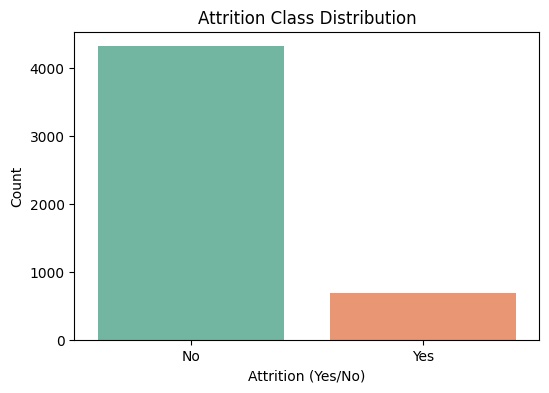

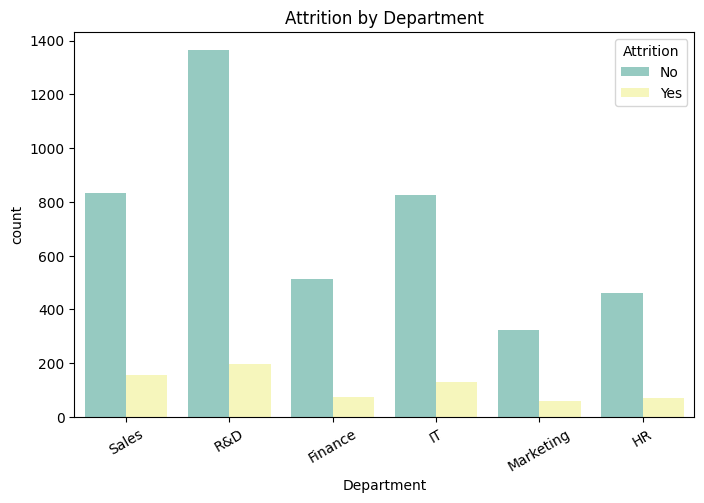

In [15]:
# ======================================================
# 📘 Project: Employee Attrition Prediction
# ======================================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve


df = pd.read_csv("hr_dataset.csv")  # Upload your CSV file path here
print("Dataset Loaded Successfully ✅")
display(df.head())

# ======================================================
# 1️⃣ Data Understanding
# ======================================================
print("\n--- Dataset Info ---")
print(df.info())

# Drop rows with missing values
df_drop = df.dropna()

print("\n--- Class Distribution ---")
print(df["Attrition"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='Set2', hue='Attrition')
plt.title("Attrition Class Distribution")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set3')
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()


🔹 Unique Values After Cleaning:
Department: ['Sales' 'R&D' 'Finance' 'It' 'Marketing' 'Hr']
OverTime: ['Yes' 'No']
Attrition: ['No' 'Yes']


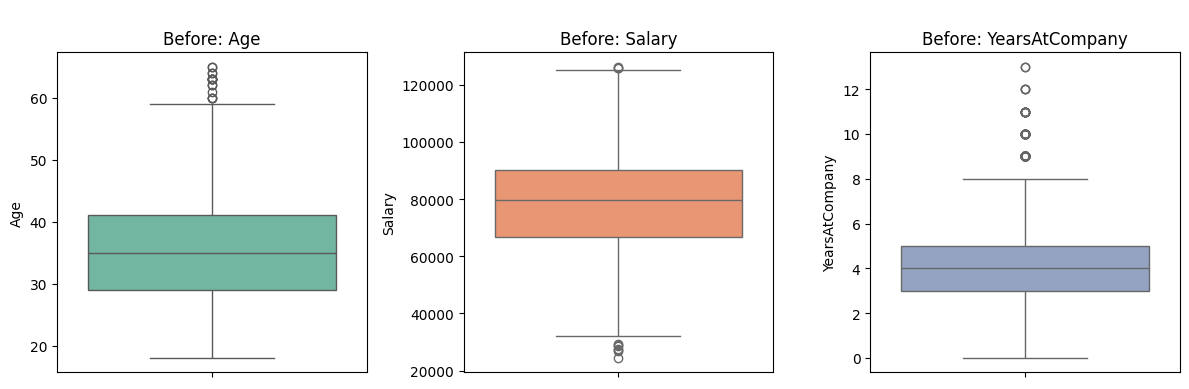


✅ Outliers removed. New shape: (4850, 11)


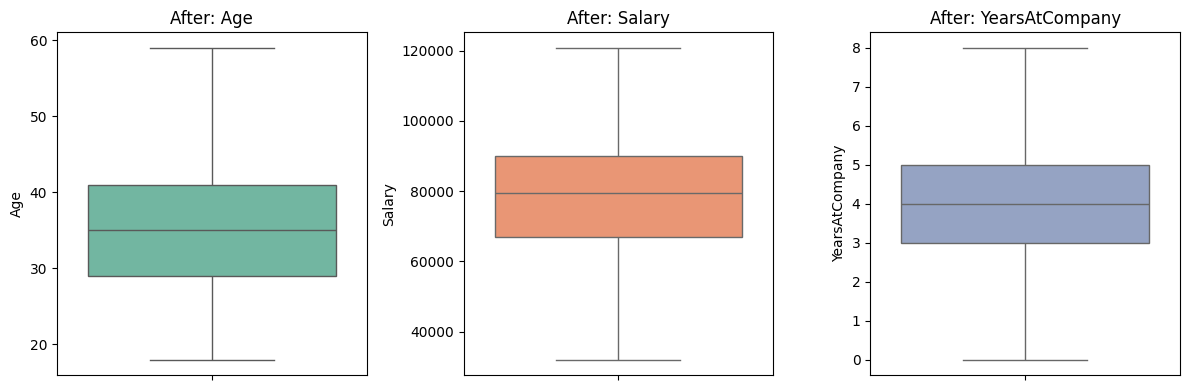


✅ Data cleaned successfully!


In [16]:
# ======================================================
# 2️⃣ Data Cleaning
# ======================================================
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing data (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Fix inconsistent entries (strip spaces, capitalize)
df["Department"] = df["Department"].str.strip().str.title()
df['OverTime'] = df['OverTime'].str.strip().str.capitalize()
df['Attrition'] = df['Attrition'].str.strip().str.capitalize()

# Check unique values after cleanup
print("\n🔹 Unique Values After Cleaning:")
print("Department:", df['Department'].unique())
print("OverTime:", df['OverTime'].unique())
print("Attrition:", df['Attrition'].unique())

# Outlier Detection & Handling
numeric_cols = ['Age', 'Salary', 'YearsAtCompany']
color= sns.color_palette("Set2", len(numeric_cols))

# Boxplots before outlier removal
plt.figure(figsize=(12,4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df[col], color= color[i])
    plt.title(f"\nBefore: {col}")
plt.tight_layout()
plt.show()

# Remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"\n✅ Outliers removed. New shape: {df.shape}")

# Boxplots after outlier removal
plt.figure(figsize=(12,4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=df[col], color= color[i])
    plt.title(f"After: {col}")
plt.tight_layout()
plt.show()

print("\n✅ Data cleaned successfully!")


🔹 New Columns Added:
['OverTime_Hours']

🔹 Updated Shape: (4850, 12)

Preview of Engineered Features:


,EmpID,YearsAtCompany,OverTime,OverTime_Hours,Attrition
0,EMP00001,4,Yes,6,No
1,EMP00002,6,Yes,12,No
2,EMP00003,2,No,2,No
3,EMP00004,1,Yes,10,Yes
4,EMP00005,4,Yes,15,No


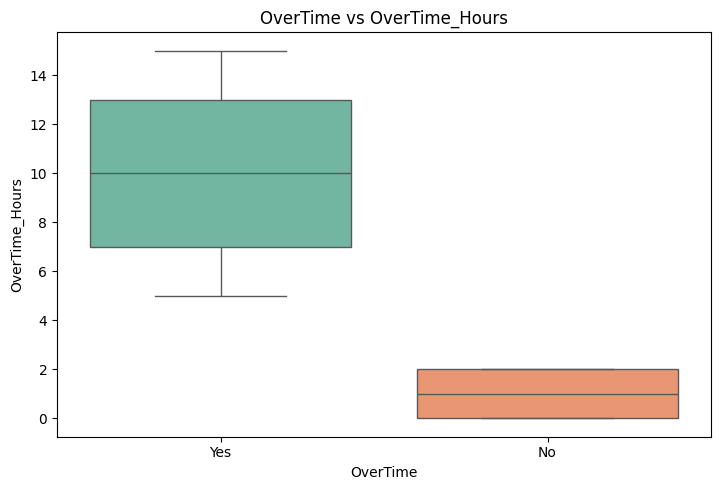

In [17]:
# ==========================================
# 3️⃣ Feature Engineering
# ==========================================

# -------------------------------
# Create 'OverTime_Hours'
# -------------------------------
# Assuming:
# - OverTime = 'Yes' → random between 5–15 hours/week
# - OverTime = 'No'  → random between 0–2 hours/week
df['OverTime_Hours'] = df['OverTime'].apply(lambda x: np.random.randint(5, 16) if x == 'Yes' else np.random.randint(0, 3))

# -------------------------------
# Quick Sanity Check
# -------------------------------
print("\n🔹 New Columns Added:")
print(['OverTime_Hours'])
print("\n🔹 Updated Shape:", df.shape)

print("\nPreview of Engineered Features:")
display(df[['EmpID', 'YearsAtCompany', 'OverTime', 'OverTime_Hours',
             'Attrition']].head())

# -------------------------------
# Visualize Feature Distributions
# -------------------------------
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 2)
sns.boxplot(x='OverTime', y='OverTime_Hours', data=df, palette='Set2', hue='OverTime', legend=False)
plt.title("OverTime vs OverTime_Hours")

plt.tight_layout()
plt.show()


🔹 Categorical Columns to Encode: ['Department', 'OverTime', 'Attrition']


'🔢 Final Encoded Dataset:'

,Age,Salary,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Education,Attrition,OverTime_Hours,Department_Hr,Department_It,Department_Marketing,Department_R&D,Department_Sales
0,39,54691,4,3,3,1,3,0,6,False,False,False,False,True
1,34,45666,6,4,2,1,2,0,12,False,False,False,False,True
2,41,86325,2,1,4,0,4,0,2,False,False,False,True,False
3,49,75197,1,2,2,1,3,1,10,False,False,False,True,False
4,33,73229,4,3,1,1,3,0,15,False,False,False,True,False


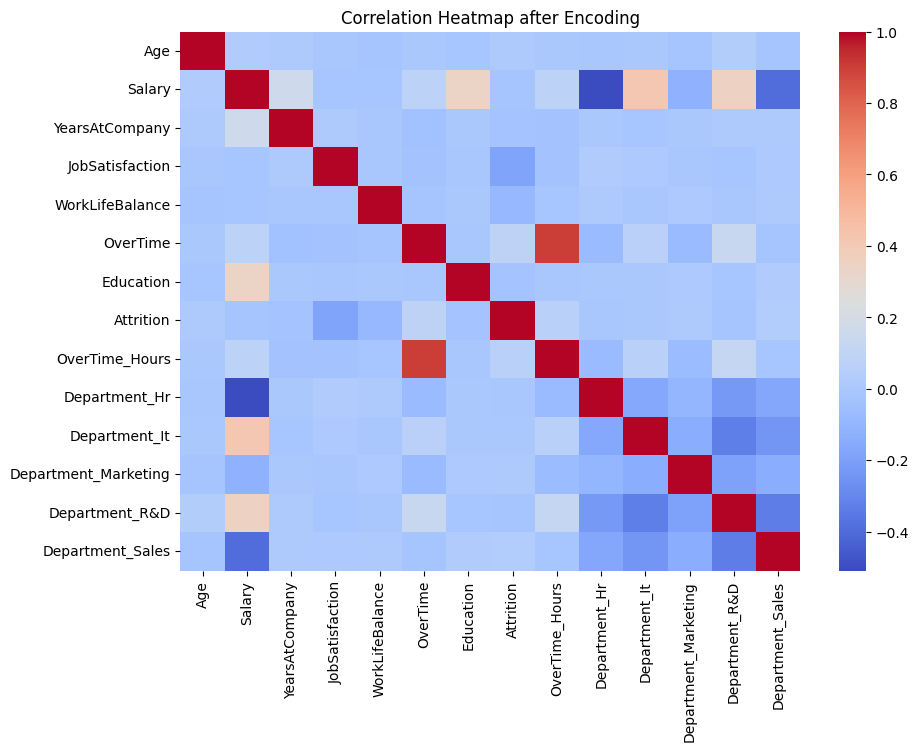

In [18]:
# =======================================================
# 4️⃣ Encoding Categorical Variables
# =======================================================

# ---------------------------------------
# Identify categorical columns
# ---------------------------------------
categorical_cols = ['Department', 'OverTime', 'Attrition']
print("\n🔹 Categorical Columns to Encode:", categorical_cols)

# ---------------------------------------
# Binary Label Encoding
# ---------------------------------------
le = LabelEncoder()

# OverTime: Yes/No → 1/0
df['OverTime'] = le.fit_transform(df['OverTime'])  # Pass=1, Fail=0

# Attrition: Yes/No → 1/0
df['Attrition'] = le.fit_transform(df['Attrition'])  # Pass=1, Fail=0

# ---------------------------------------
# One-Hot Encoding for multi-class column (Department)
# ---------------------------------------
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

# ---------------------------------------
# Drop non-numeric identifiers
# ---------------------------------------
df.drop(columns=['EmpID', 'Name'], inplace=True)
display("🔢 Final Encoded Dataset:", df.head())

# ---------------------------------------
# Quick Visualization (Optional)
# ---------------------------------------
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap after Encoding")
plt.show()


In [19]:
# ==========================================
# 5️⃣ SCALE THE DATA
# ==========================================
scaler = StandardScaler()
# Exclude 'Attrition' from the columns to be scaled
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition', errors='ignore')
print("\n🔹 Numeric Columns to Scale:", num_cols)
df[num_cols] = scaler.fit_transform(df[num_cols])
display(df.head())


🔹 Numeric Columns to Scale: Index(['Age', 'Salary', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance',
       'OverTime', 'Education', 'OverTime_Hours'],
      dtype='object')


,Age,Salary,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Education,Attrition,OverTime_Hours,Department_Hr,Department_It,Department_Marketing,Department_R&D,Department_Sales
0,0.457076,-1.482373,0.066146,0.006824,0.289338,1.423228,-0.105332,0,0.444626,False,False,False,False,True
1,-0.123122,-2.049672,1.168587,0.926216,-0.842346,1.423228,-1.215896,0,1.741861,False,False,False,False,True
2,0.689156,0.506098,-1.036294,-1.831960,1.421021,-0.702628,1.005232,0,-0.420197,False,False,False,True,False
3,1.617473,-0.193393,-1.587514,-0.912568,-0.842346,1.423228,-0.105332,1,1.309449,False,False,False,True,False
4,-0.239161,-0.317099,0.066146,0.006824,-1.974029,1.423228,-0.105332,0,2.390478,False,False,False,True,False


In [20]:
# ==========================================
# 6️⃣ MODEL BUILDING
# ==========================================
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("📝 Custom Dataset Created Successfully!")
display(df.head())

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}



📝 Custom Dataset Created Successfully!


,Age,Salary,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Education,Attrition,OverTime_Hours,Department_Hr,Department_It,Department_Marketing,Department_R&D,Department_Sales
0,0.457076,-1.482373,0.066146,0.006824,0.289338,1.423228,-0.105332,0,0.444626,False,False,False,False,True
1,-0.123122,-2.049672,1.168587,0.926216,-0.842346,1.423228,-1.215896,0,1.741861,False,False,False,False,True
2,0.689156,0.506098,-1.036294,-1.831960,1.421021,-0.702628,1.005232,0,-0.420197,False,False,False,True,False
3,1.617473,-0.193393,-1.587514,-0.912568,-0.842346,1.423228,-0.105332,1,1.309449,False,False,False,True,False
4,-0.239161,-0.317099,0.066146,0.006824,-1.974029,1.423228,-0.105332,0,2.390478,False,False,False,True,False


In [21]:
# ==========================================
# 7️⃣ MODEL EVALUATION
# ==========================================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1-Score": round(f1_score(y_test, y_pred), 3),
        "ROC-AUC": round(roc_auc_score(y_test, y_pred), 3)
    })

df_results = pd.DataFrame(results)
print("\n🧿 MODEL SELECTION RESULTS (Pre Tuning):")
display(df_results)


🧿 MODEL SELECTION RESULTS (Pre Tuning):


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.862,0.500,0.006,0.012,0.503
1,Decision Tree,0.754,0.164,0.192,0.177,0.518
2,Random Forest,0.860,0.200,0.006,0.012,0.501



🎉 Best Parameters Found: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

🛑 POST-TUNING RESULTS:
	Accuracy : 0.862
	Precision: 0.0
	Recall   : 0.0
	F1-Score : 0.0
	ROC-AUC  : 0.5

🔢 CONFUSION MATRIX (Tuned Logistic Regression):
 [[1046    0]
 [ 167    0]]


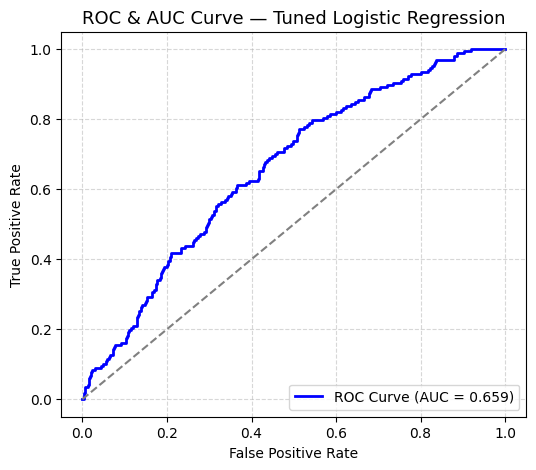

In [22]:
# ==========================================
# 8️⃣ HYPERPARAMETER TUNING: (best model)
# ==========================================
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # 'l1' and 'elasticnet' require different solvers
    'solver': ['liblinear', 'lbfgs'] # Solvers that support 'l2'
}

# Use GridSearchCV with Logistic Regression
grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=500), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("\n🎉 Best Parameters Found:", grid.best_params_)

y_pred_tuned = best_model.predict(X_test)
# For Logistic Regression, predict_proba is available
y_proba = best_model.predict_proba(X_test)[:, 1]


# Evaluation
acc = round(accuracy_score(y_test, y_pred_tuned), 3)
prec = round(precision_score(y_test, y_pred_tuned), 3)
rec = round(recall_score(y_test, y_pred_tuned), 3)
f1 = round(f1_score(y_test, y_pred_tuned), 3)
roc_auc = round(roc_auc_score(y_test, y_pred_tuned), 3)


print("\n🛑 POST-TUNING RESULTS:")
print("\tAccuracy :", acc)
print("\tPrecision:", prec)
print("\tRecall   :", rec)
print("\tF1-Score :", f1)
print("\tROC-AUC  :", roc_auc)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
print("\n🔢 CONFUSION MATRIX (Tuned Logistic Regression):\n", cm)

# ==========================================
# 9️⃣ ROC & AUC CURVE VISUALIZATION
# ==========================================
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc_value:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC & AUC Curve — Tuned Logistic Regression", fontsize=13)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

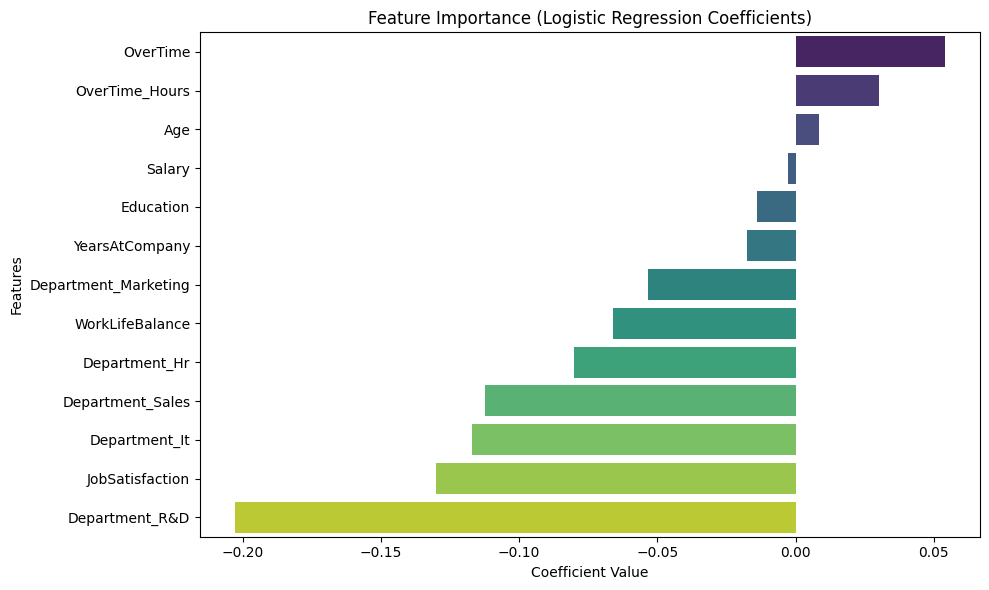

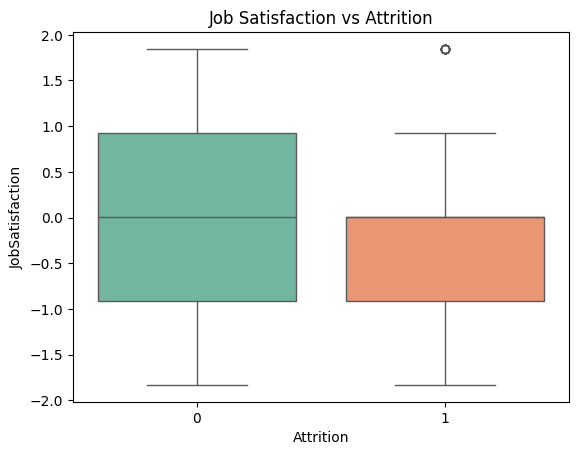

In [23]:
# ======================================================
# 9️⃣Feature Importance (Logistic Regression)
# ======================================================
# For Logistic Regression, we can use the coefficients as a measure of feature importance.
# The absolute value of the coefficient indicates the magnitude of the impact,
# and the sign indicates the direction (positive coefficient increases the log-odds of the positive class).
coefficients = best_model.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ======================================================
# Correlation: JobSatisfaction vs Attrition
# ======================================================
sns.boxplot(x="Attrition", y="JobSatisfaction", data=df, palette= 'Set2')
plt.title("Job Satisfaction vs Attrition")
plt.show()